In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from astropy.table import Table

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10 , 10]

In [111]:
data = Table.read('SDSS_LAB2024_photometry_short.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237654786779512954,186.625855,8.060912,0.024841,0.665800,0.048618,2.193930,0.026248,3.627600,0.023109,4.691543,0.031664,5.648791,0.077501
1,1237660612902387797,175.627335,8.867605,0.021365,0.194875,0.008690,0.772781,0.015247,1.450847,0.028425,1.935681,0.039355,2.362268,0.047718
2,1237660613437030626,170.502335,9.205437,0.029929,0.128543,0.007119,0.301246,0.003228,0.392141,0.005617,0.450633,0.008410,0.532307,0.028402
3,1237660613975933049,175.205612,9.766913,0.026406,0.142618,0.007928,0.415152,0.004863,0.631771,0.008554,0.768277,0.010840,0.833722,0.034696
4,1237660613976260666,175.868774,9.829786,0.026271,0.357910,0.027307,1.101355,0.054994,1.494037,0.129996,1.724427,0.192306,0.746018,0.232139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10632,1237665368504533032,161.175293,30.227270,0.032581,0.195161,0.006423,0.612081,0.003032,1.054999,0.004641,1.392162,0.007249,1.786716,0.028765
10633,1237665368507416641,168.704453,31.302917,0.027719,0.038527,0.005049,0.165195,0.002499,0.312763,0.004346,0.402318,0.006343,0.467832,0.024051
10634,1237665368507941002,170.216873,31.460140,0.023966,0.420723,0.010198,1.722260,0.006543,3.398171,0.011274,4.853016,0.017088,6.366136,0.052542
10635,1237665367970545680,168.785477,31.002035,0.027952,0.209569,0.006240,1.103654,0.012979,2.292109,0.025929,3.305582,0.039349,4.265988,0.048930


In [112]:
def Plot(row_index):
    row = data.T[row_index]
    x = np.array([3540, 4750, 6220, 7630, 9050])
    y = np.array([row['sdss.up'], row['sdss.gp'], row['sdss.rp'], row['sdss.ip'], row['sdss.zp']])
    y_err = np.array([row['sdss.up_err'], row['sdss.gp_err'], row['sdss.rp_err'], row['sdss.ip_err'], row['sdss.zp_err']])
    plt.errorbar(x, y, yerr=y_err, ls='--',  fmt='o', color='deepskyblue', ecolor='grey', capsize=4, capthick=2)
    plt.ylim(0)
    plt.xlabel('$\lambda [A]$')
    plt.ylabel('$f_\\nu$')

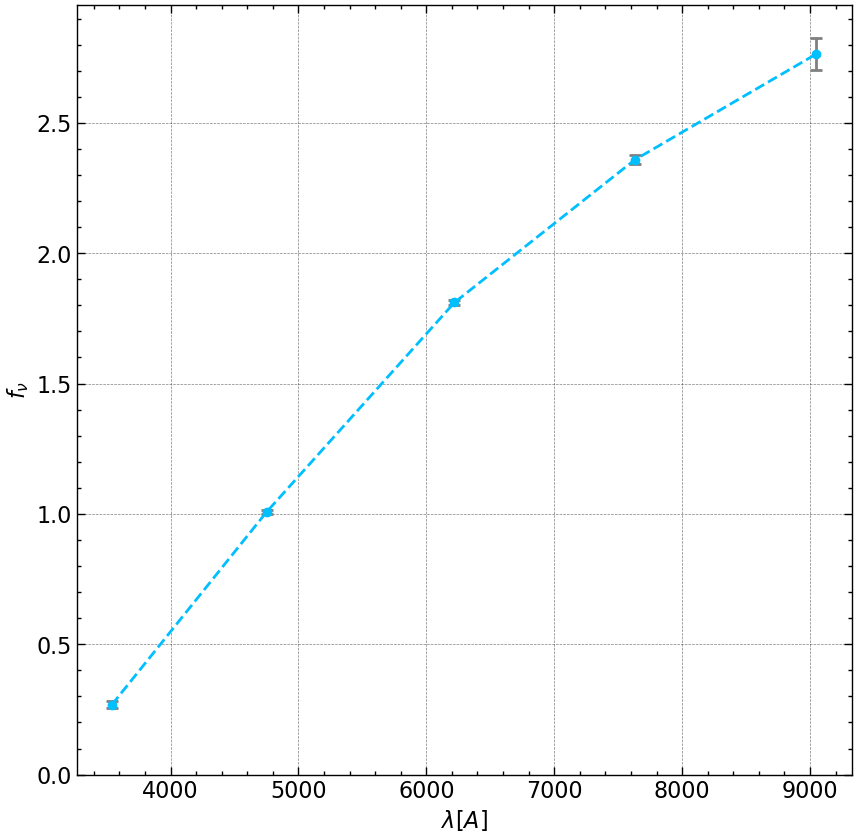

In [113]:
Plot(2000)

In [114]:
results = Table.read('./out/results.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,...,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237654786779512954,2.525346,2.801942,2.667056,3.061152,2.535478,2.814565,2.145007,0.109004,4.571734,...,6.153953e+09,5.157735e+06,8.155459e+52,2.030885e+51,7.952370e+52,0.649250,2.175378,3.627898,4.585303,5.673076
1,1237660612902387797,0.398288,0.581187,0.417836,0.603521,0.399715,0.582696,0.757948,0.040968,1.887248,...,2.144405e+09,3.218486e+04,1.071463e+51,5.786006e+50,4.928627e+50,0.190608,0.780972,1.460961,1.894138,2.378886
2,1237660613437030626,0.469563,0.512613,0.531558,0.699403,0.473230,0.519945,0.295319,0.013590,0.454811,...,5.313905e+08,3.248084e+06,5.063142e+52,3.320649e+50,5.029935e+52,0.127959,0.300397,0.393398,0.454190,0.529473
3,1237660613975933049,0.451115,0.431753,0.481463,0.499774,0.453132,0.433872,0.406155,0.021841,0.735969,...,7.612278e+08,7.226328e+05,1.141402e+52,2.992986e+50,1.111472e+52,0.142006,0.427679,0.630097,0.743179,0.863849
4,1237660613976260666,0.232370,0.402614,0.293423,0.440635,0.236075,0.404616,1.041650,0.071596,1.333142,...,6.570337e+08,1.785063e+00,1.952166e+50,1.951941e+50,2.248691e+46,0.371103,1.114775,1.242302,1.298292,1.365566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10632,1237665368504533032,1.624478,1.750409,1.697461,1.910097,1.629863,1.758829,0.617976,0.023228,1.380041,...,4.855382e+09,4.808613e+06,7.576449e+52,1.371202e+51,7.439329e+52,0.192745,0.612672,1.052340,1.377740,1.782884
10633,1237665368507416641,0.097064,0.183816,0.103657,0.193047,0.097532,0.184433,0.160138,0.010051,0.393382,...,7.058835e+08,8.616669e-14,1.885660e+50,1.885660e+50,1.207705e+33,0.039548,0.165481,0.307452,0.397011,0.488092
10634,1237665368507941002,1.378368,1.801994,1.408932,1.829063,1.380850,1.804147,1.712257,0.074877,4.754975,...,9.120403e+09,3.943709e+06,6.358186e+52,2.776413e+51,6.080545e+52,0.411897,1.721743,3.405173,4.724300,6.332343
10635,1237665367970545680,0.211036,0.721112,0.219310,0.736430,0.211705,0.722373,1.045836,0.041938,3.236654,...,7.493213e+09,9.949590e-77,1.915528e+51,1.915528e+51,7.719519e-31,0.210113,1.124262,2.308487,3.275843,4.299205


Text(0, 0.5, 'SFR $[M_\\odot/yr]$')

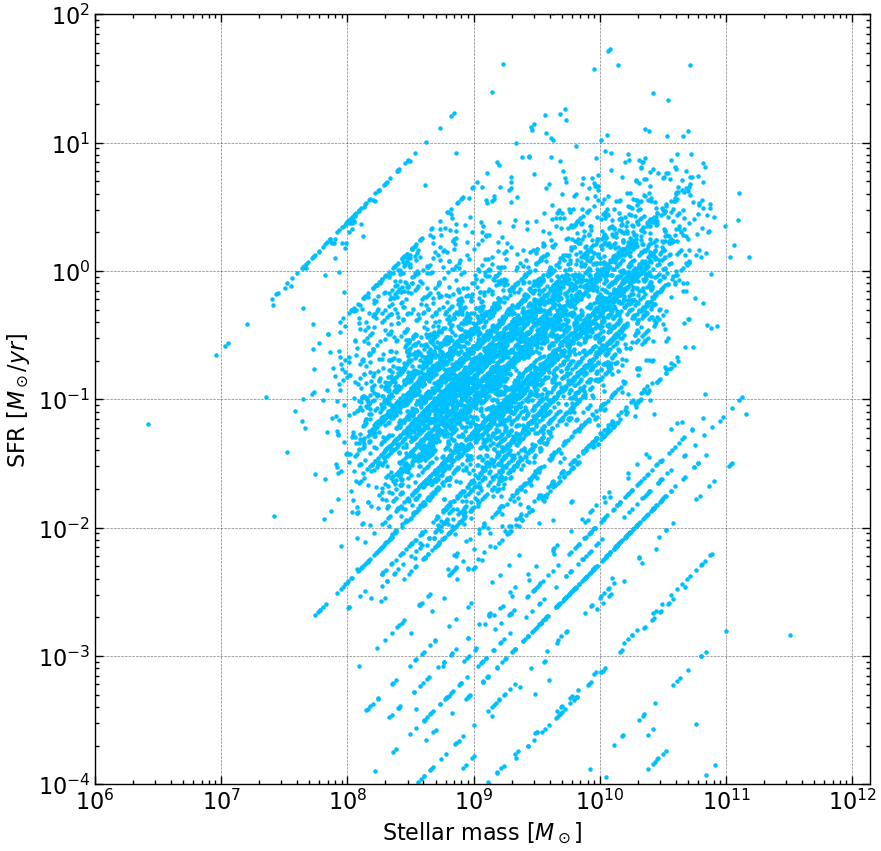

In [115]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']
plt.scatter(x_data, y_data, s=5, color='deepskyblue')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e6)
plt.ylim(1e-4, 1e2)
plt.xlabel('Stellar mass $[M_\odot]$')
plt.ylabel('SFR $[M_\odot/yr]$')

(0.0001, 100.0)

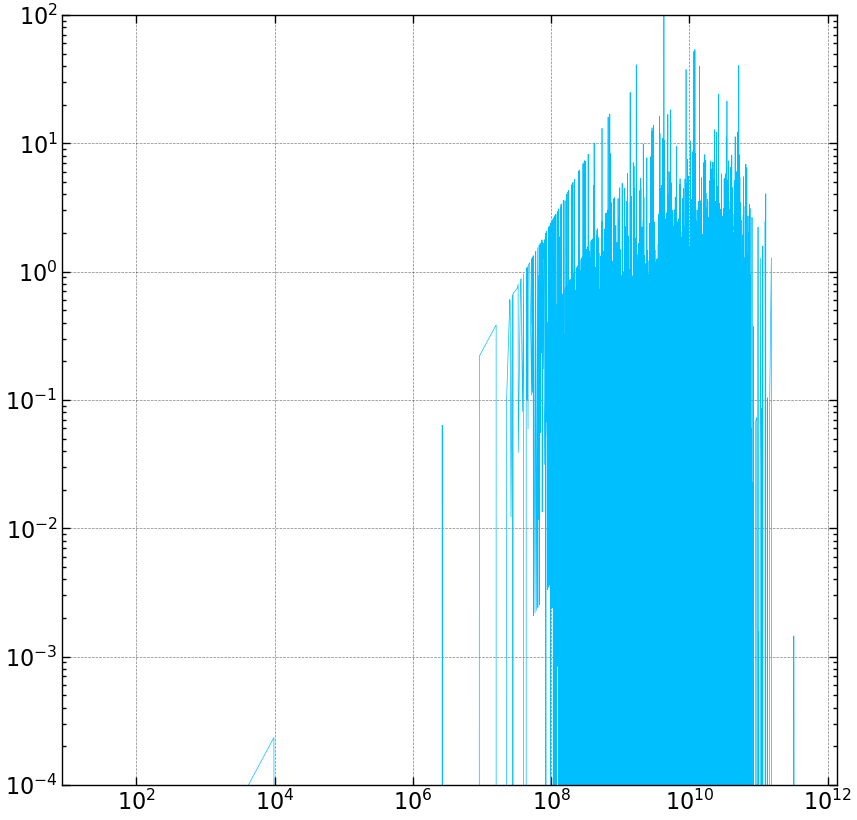

In [116]:
arr1inds = x_data.argsort()
x_data = x_data[arr1inds[::-1]]
y_data = y_data[arr1inds[::-1]]
plt.plot(x_data, y_data, lw=0.5, color='deepskyblue')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 1e2)